# Debt-to-Equity and Revenue Profiling

This project focuses on evaluating financial stability and performance by analyzing how debt levels relate to revenue and profitability. It applies financial ratio analysis, data preparation, and summary statistics to identify risk patterns, ensure data integrity, and highlight indicators of financial strength.

The analysis begins with cleaning and validating key financial metrics to remove inconsistencies and standardize values. It then examines core ratios such as Debt-to-Equity and Debt-to-Income to assess leverage, solvency, and long-term financial balance. Profitability measures, including profit margin and revenue trends, are also explored to understand how effectively organizations convert income into profit while managing debt obligations.

Findings reveal that companies with negative debt-to-equity ratios often indicate structural or financial instability. The introduction of a Debt-to-Income ratio provides additional insight into revenue sufficiency for covering long-term debt. Together, these measures enable a clear view of business health and support informed financial decision-making.

The resulting output includes a clean, structured dataset with computed financial ratios, comparative summaries, and categorized performance indicators that can be used for further visualization, modeling, or strategic evaluation.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [75]:
# Load the data from the Excel file into a pandas DataFrame
df = pd.read_excel("D598 Data Set.xlsx")
df.head()  # Display the first few rows


,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin
0,41872013,Kentucky,16889000.0,18046000.0,0.935886,25986000.0,136753000,0.023663
1,76232013,Iowa,6252000.0,18293621.0,0.341758,14474000.0,34226553,0.265015
2,160992013,Texas,19200000.0,177858000.0,0.107951,72787000.0,384196000,0.130413
3,197452013,Delaware,117592000.0,278773000.0,0.421820,558749000.0,444306000,0.196768
4,241042013,Illinois,4408000.0,52064000.0,0.084665,19898000.0,121541000,0.168305


In [76]:
# Step 1: Check for duplicate rows and remove them
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:")
    display(duplicates)
    df = df.drop_duplicates()
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [77]:
# Handle missing or invalid data
initial_row_count = len(df)
df = df.dropna(subset=["Total Revenue", "Total Long-term Debt"])  # Drop rows with missing values
df = df[df["Total Revenue"] > 0]  # Exclude rows with negative or zero revenue
print(f"Rows removed due to missing/invalid data: {initial_row_count - len(df)}")

Rows removed due to missing/invalid data: 0


In [78]:
# Add a new column for 'Debt to Income'
df["Debt to Income"] = df["Total Long-term Debt"] / df["Total Revenue"]
df["Debt to Income"] = df["Debt to Income"].fillna(0)  # Handle NaN values

In [79]:
# Step 4: Group the data by state and calculate summary statistics
grouped_stats = df.groupby("Business State").agg({
    "Total Long-term Debt": ["mean", "median", "min", "max"],
    "Total Equity": ["mean", "median", "min", "max"],
    "Debt to Equity": ["mean", "median", "min", "max"],
    "Total Liabilities": ["mean", "median", "min", "max"],
    "Total Revenue": ["mean", "median", "min", "max"],
    "Profit Margin": ["mean", "median", "min", "max"],
})

# Formatting function for monetary and ratio data
def format_with_suffix_and_dollar(value, is_currency=False, is_percentage=False):
    if is_currency:  # For monetary values
        if value >= 1_000_000_000:
            formatted_value = f"{value / 1_000_000_000:.2f}B"
        elif value >= 1_000_000:
            formatted_value = f"{value / 1_000_000:.2f}M"
        elif value >= 1_000:
            formatted_value = f"{value / 1_000:.2f}K"
        else:
            formatted_value = f"{value:.2f}"
        return f"${formatted_value}"
    elif is_percentage:  # For percentage values (e.g., Profit Margin)
        return f"{value * 100:.2f}%"
    else:  # For numeric ratios like Debt to Equity
        return f"{value:.2f}"

# Format grouped statistics for presentation
currency_columns = ["Total Long-term Debt", "Total Equity", "Total Liabilities", "Total Revenue"]
percentage_columns = ["Profit Margin"]
ratio_columns = ["Debt to Equity"]

formatted_grouped_stats = grouped_stats.copy()

for column in formatted_grouped_stats.columns.levels[0]:
    if column in currency_columns:
        formatted_grouped_stats[column] = formatted_grouped_stats[column].applymap(lambda x: format_with_suffix_and_dollar(x, is_currency=True))
    elif column in percentage_columns:
        formatted_grouped_stats[column] = formatted_grouped_stats[column].applymap(lambda x: format_with_suffix_and_dollar(x, is_percentage=True))
    elif column in ratio_columns:
        formatted_grouped_stats[column] = formatted_grouped_stats[column].applymap(lambda x: format_with_suffix_and_dollar(x, is_currency=False))

print("\nSummary Statistics by Business State:")
display(formatted_grouped_stats)


Summary Statistics by Business State:


Total Long-term Debt                                \
                                mean    median       min       max   
Business State                                                       
Alabama                     $674.39M  $674.39M    $5.31M    $1.34B   
Arizona                      $65.09M   $65.09M   $65.09M   $65.09M   
Arkansas                     $89.60M   $89.60M   $70.37M  $108.84M   
California                   $32.74M    $4.72M   $15.00K  $335.00M   
Colorado                     $84.70M   $29.33M    $3.38M  $375.32M   
Connecticut                  $18.51M   $18.51M   $18.51M   $18.51M   
Delaware                     $61.56M   $60.16M    $8.33M  $117.59M   
Florida                      $12.30M    $1.81M    $3.00K   $45.59M   
Hawaii                      $605.50M  $605.50M  $605.50M  $605.50M   
Idaho                         $2.46M    $2.46M   $16.00K    $4.91M   
Illinois                     $11.33M    $9.03M    $1.60M   $33.66M   
Indiana                      $21.69M    $5.11M    $4.95M   $55.00M   
Iowa                          $6.25M    $6.25M    $6.25M    $6.25M   
Kentucky                     $16.89M   $16.89M   $16.89M   $16.89M   
Louisiana                   $379.00M  $379.00M  $379.00M  $379.00M   
MInnesota                    $74.93M   $10.17M    $1.33M  $389.59M   
Maine                       $896.00K  $896.00K  $896.00K  $896.00K   
Maryland                     $14.49M  $958.50K   $25.00K   $56.00M   
Massachusetts                 $7.72M    $4.91M  $232.00K   $24.58M   
Michigan                     $36.11M   $21.61M    $2.03M   $84.70M   
Missouri                    $173.08M  $173.08M   $60.80M  $285.37M   
Montana                       $8.73M    $8.73M    $1.00M   $16.46M   
Nebraska                     $18.92M   $18.92M   $18.92M   $18.92M   
Nevada                        $5.23M    $5.23M    $5.23M    $5.23M   
New Jersey                  $108.38M    $5.55M   $30.00K  $701.06M   
New Mexico                    $1.67B    $1.67B    $1.67B    $1.67B   
New York                     $33.57M    $6.45M  $187.00K  $190.45M   
North Carolina              $194.95M   $22.65M   $16.00K  $730.16M   
Ohio                        $115.18M  $119.38M    $2.43M  $263.88M   
Oregon                        $8.28M    $8.28M    $5.51M   $11.05M   
Pennsylvania                 $88.22M   $86.80M  $297.00K  $177.55M   
Rhode Island                 $51.05M   $51.05M   $51.05M   $51.05M   
South Carolina              $130.34M  $130.34M   $94.76M  $165.92M   
Tennessee                    $65.63M   $65.63M   $29.49M  $101.76M   
Texas                       $542.46M   $19.20M  $931.00K    $3.18B   
Utah                          $1.79M    $1.79M    $1.56M    $2.01M   
Virginia                     $26.83M   $13.00M   $21.00K   $90.21M   
Washington                   $52.42M   $52.42M   $10.60M   $94.24M   
Washington D.C.             $524.07M  $524.07M  $524.07M  $524.07M   
Wisconsin                    $39.58M    $2.40M  $203.00K  $190.82M   

                Total Equity                                      \
                        mean    median             min       max   
Business State                                                     
Alabama               $1.44B    $1.44B         $24.06M    $2.86B   
Arizona              $59.15M   $59.15M         $59.15M   $59.15M   
Arkansas            $108.24M  $108.24M        $100.54M  $115.95M   
California           $45.36M   $14.27M   $-15691000.00  $321.18M   
Colorado            $200.76M   $60.78M         $12.85M  $933.97M   
Connecticut           $4.40M    $4.40M          $4.40M    $4.40M   
Delaware            $151.44M  $139.31M         $48.38M  $278.77M   
Florida              $54.75M   $11.89M          $2.60M  $192.65M   
Hawaii                $1.17B    $1.17B          $1.17B    $1.17B   
Idaho               $215.58M  $215.58M          $4.85M  $426.32M   
Illinois             $67.59M   $47.51M         $12.76M  $215.30M   
Indiana              $59.91M   $82.31M          $9.46

In [81]:
# Function to format numbers with dollar signs, percentages, and appropriate scaling
def format_negative_debt_to_equity(df):
    currency_columns = ["Total Long-term Debt", "Total Equity", "Total Liabilities", "Total Revenue"]
    ratio_columns = ["Debt to Equity", "Debt to Income"]
    percentage_columns = ["Profit Margin"]

    formatted_df = df.copy()
    for col in formatted_df.columns:
        if col in currency_columns:
            formatted_df[col] = formatted_df[col].apply(
                lambda x: f"${x / 1_000_000:.2f}M" if abs(x) >= 1_000_000 else f"${x / 1_000:.2f}K"
            )
        elif col in ratio_columns:
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2f}")  # Keep as ratio
        elif col in percentage_columns:
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x * 100:.2f}%")  # Convert to percentage
    return formatted_df

# Apply formatting to negative debt-to-equity DataFrame
formatted_negative_debt_to_equity = format_negative_debt_to_equity(negative_debt_to_equity)

# Display the formatted DataFrame
print(f"Filtered {len(formatted_negative_debt_to_equity)} businesses with negative Debt to Equity:")
display(formatted_negative_debt_to_equity)

# Save the formatted DataFrame to an Excel file
formatted_negative_debt_to_equity.to_excel("formatted_negative_debt_to_equity.xlsx", index=False)
print("Formatted negative Debt to Equity data saved to 'formatted_negative_debt_to_equity.xlsx'.")

Filtered 7 businesses with negative Debt to Equity:


,Business ID,Business State,Total Long-term Debt,Total Equity,Debt to Equity,Total Liabilities,Total Revenue,Profit Margin,Debt to Income
18,934562013,Ohio,$263.88M,$-111.30M,-2.37,$592.17M,$719.78M,32.07%,0.37
57,8343652013,Washington,$10.60M,$-13.27M,-0.80,$16.62M,$8.95M,44.81%,1.18
87,9323722013,California,$21.56M,$-15.69M,-1.37,$30.05M,$37.78M,50.60%,0.57
109,10919832013,Utah,$2.01M,$-3.60M,-0.56,$6.30M,$17.76M,73.26%,0.11
117,11245242013,California,$556.00K,$-2.06M,-0.27,$3.82M,$1.10M,-8.49%,0.51
142,14535932013,Montana,$16.46M,$-3.84M,-4.28,$32.72M,$33.07M,58.24%,0.50
143,14639722013,New York,$187.00K,$-13.04M,-0.01,$15.90M,$2.39M,30.10%,0.08


Formatted negative Debt to Equity data saved to 'formatted_negative_debt_to_equity.xlsx'.


In [ ]:
# Function to format numbers with dollar signs and appropriate scaling
def format_numbers_for_display(df):
    currency_columns = ["Total Long-term Debt", "Total Equity", "Total Liabilities", "Total Revenue"]
    ratio_columns = ["Debt to Equity", "Debt to Income"]

    formatted_df = df.copy()
    for col in formatted_df.columns:
        if col in currency_columns:
            formatted_df[col] = formatted_df[col].apply(
                lambda x: f"${x / 1_000_000:.2f}M" if abs(x) >= 1_000_000 else f"${x / 1_000:.2f}K"
            )
        elif col in ratio_columns:
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2f}")
    return formatted_df

# Save the original DataFrame
df.to_excel("D598_Final_Analysis_Non_Formatted_Numbers.xlsx", index=False)
print("Original numbers saved to 'D598_Final_Analysis_Non_Formatted_Numbers.xlsx'.")

# Apply formatting and save the formatted DataFrame
formatted_df = format_numbers_for_display(df)
formatted_df.to_excel("D598_Final_Analysis_Formatted_Numbers.xlsx", index=False)
print("Formatted numbers saved to 'D598_Final_Analysis_Formatted_Numbers.xlsx'.")

Original numbers saved to 'D598_Final_Analysis_Non_Formatted_Numbers.xlsx'.
Formatted numbers saved to 'D598_Final_Analysis_Formatted_Numbers.xlsx'.


# Visualizations


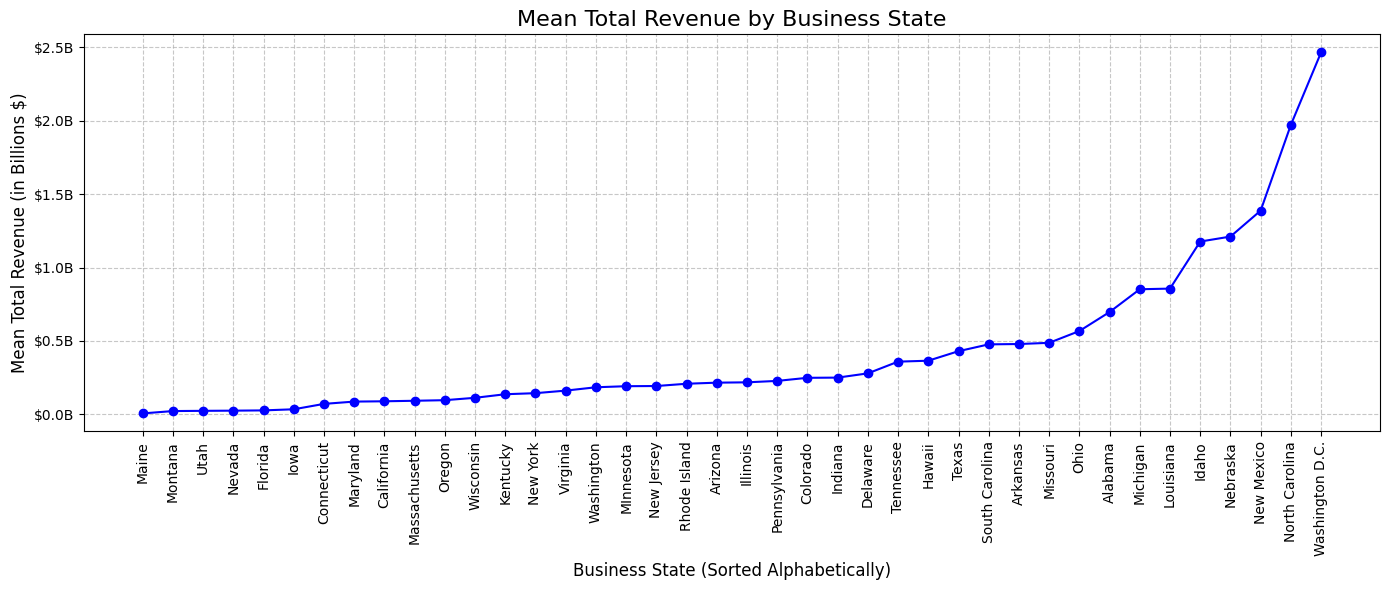

In [63]:
import matplotlib.ticker as ticker

# Line Chart: Mean Total Revenue by Business State (Sorted)
statewise_revenue = final_analysis_df.groupby('Business State')['Total Revenue'].mean().sort_values()

plt.figure(figsize=(14, 6))
# Convert revenue values to billions for better readability
plt.plot(statewise_revenue.index, statewise_revenue.values / 1_000_000_000, marker='o', linestyle='-', color='b')
plt.title('Mean Total Revenue by Business State', fontsize=16)
plt.xlabel('Business State (Sorted Alphabetically)', fontsize=12)
plt.ylabel('Mean Total Revenue (in Billions $)', fontsize=12)
plt.xticks(rotation=90)

# Format y-axis to display values in billions with "B"
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${x:.1f}B"))

plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("mean_total_revenue_by_state_in_billions.png")
plt.show()


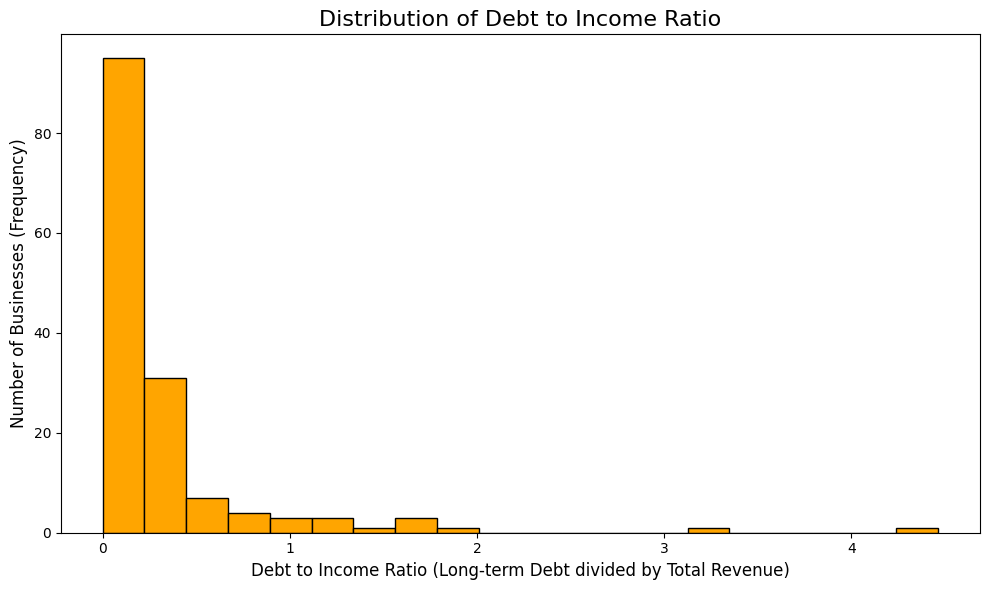

In [64]:
# 2. Histogram: Distribution of Debt to Income Ratio
plt.figure(figsize=(10, 6))
plt.hist(df['Debt to Income'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Debt to Income Ratio', fontsize=16)
plt.xlabel('Debt to Income Ratio (Long-term Debt divided by Total Revenue)', fontsize=12)
plt.ylabel('Number of Businesses (Frequency)', fontsize=12)
plt.tight_layout()
plt.savefig("debt_to_income_distribution.png")
plt.show()


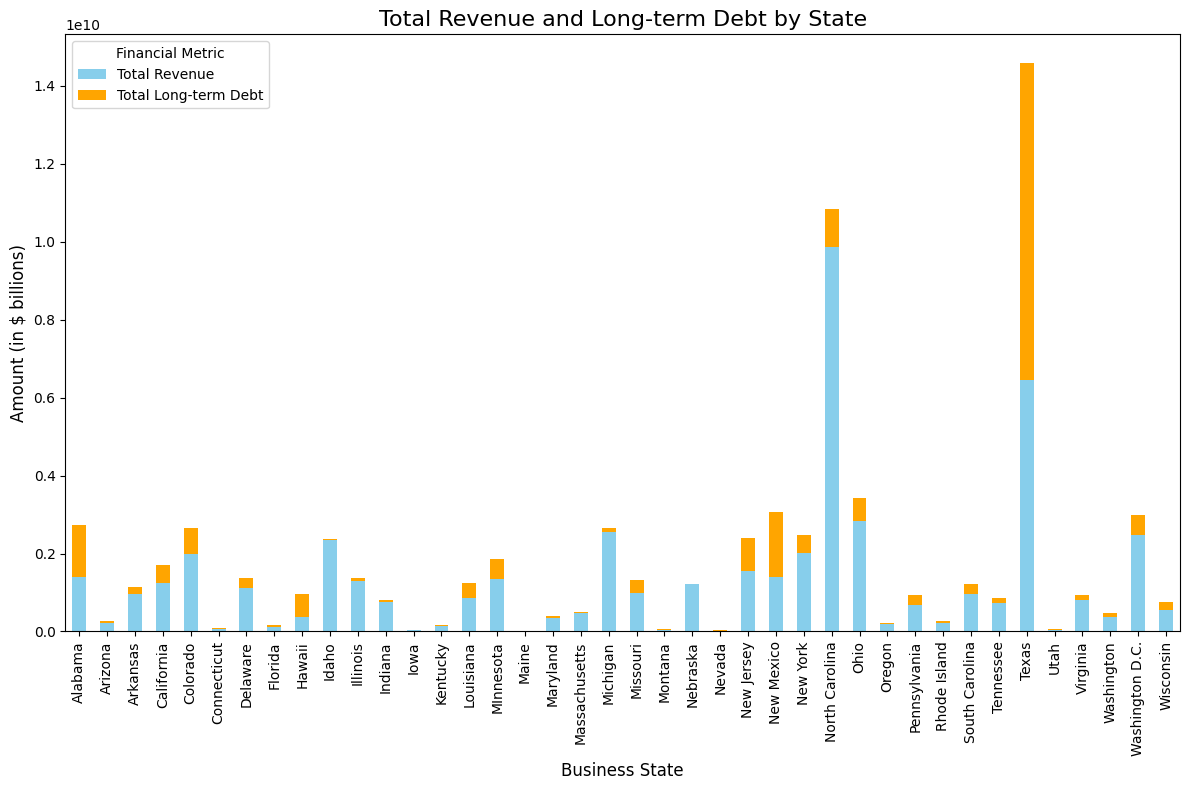

In [65]:
# 3. Stacked Bar Chart: Revenue and Debt by State
statewise_data = df.groupby('Business State')[['Total Revenue', 'Total Long-term Debt']].sum()
statewise_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'orange'])
plt.title('Total Revenue and Long-term Debt by State', fontsize=16)
plt.xlabel('Business State', fontsize=12)
plt.ylabel('Amount (in $ billions)', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Financial Metric", loc="upper left")
plt.tight_layout()
plt.savefig("stacked_bar_revenue_debt_by_state.png")
plt.show()

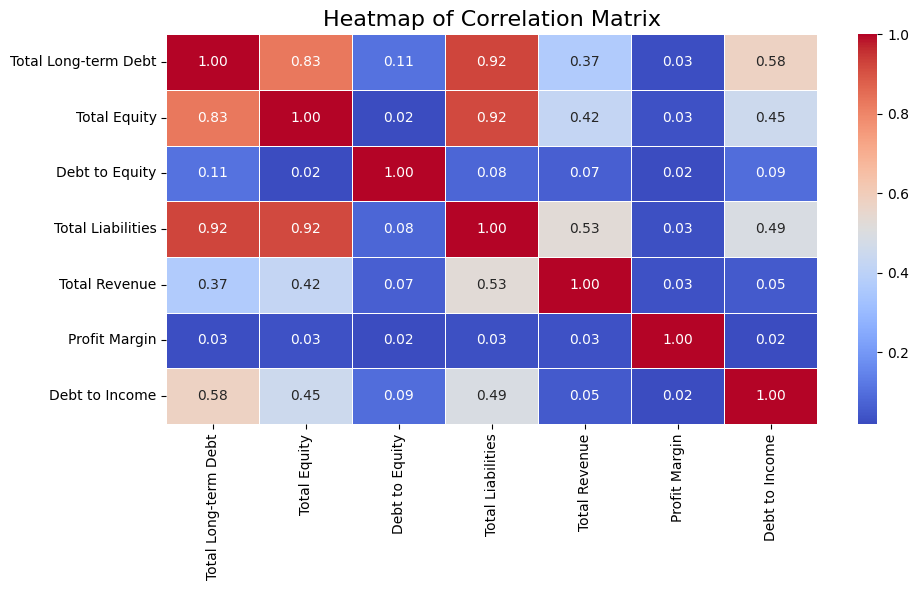

In [66]:
# 4. Heatmap: Correlation Matrix
correlation_matrix = df[['Total Long-term Debt', 'Total Equity', 'Debt to Equity',
                         'Total Liabilities', 'Total Revenue', 'Profit Margin', 'Debt to Income']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()